In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Importing the data 

In [2]:
df= pd.read_csv(r"C:\Users\Faizan\Downloads\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

# Ham

In [5]:
ham_words = ' '.join(df[df['Category']== 'ham']['Message'].values)

In [6]:
pip install WordCloud


In [7]:
from wordcloud import WordCloud


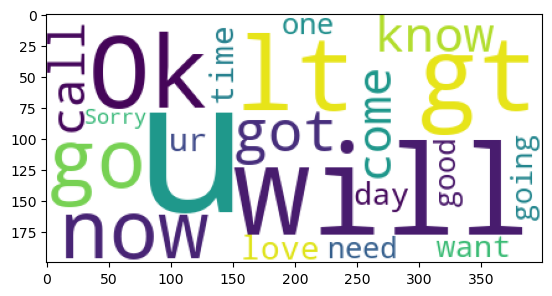

In [8]:
ham_plot = WordCloud(max_words=20,background_color='white').generate(ham_words)
plt.imshow(ham_plot)

# Spam

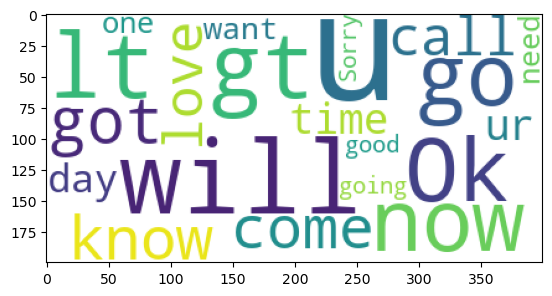

In [9]:
spam_words = ' '.join(df[df['Category']== 'spam']['Message'].values)
spam_plot = WordCloud(max_words=20,background_color='white').generate(ham_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

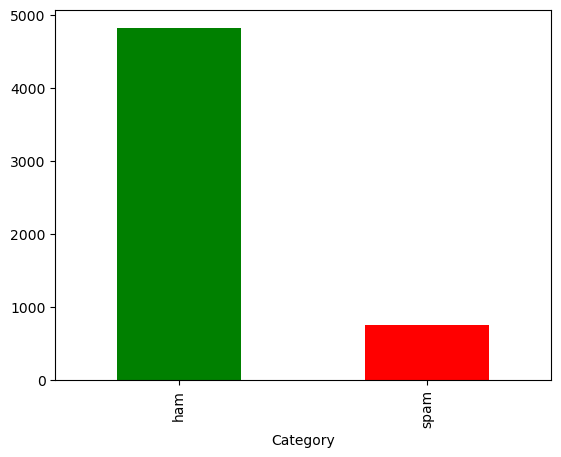

In [10]:
df['Category'].value_counts().plot(kind = 'bar',color = ['Green','red'])

# Bags of words

In [11]:
X = df.drop('Category',axis = 1)

In [13]:
bow = CountVectorizer(stop_words='english',)

In [22]:
## Pickling of bow vectorizer

In [23]:
pickle.dump(bow,open("vectorizer.pkl","wb"))

In [14]:
bow.fit(df['Message'])
X = bow.transform(df['Message']).toarray()
y = df['Category']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

# Naive Bays

In [19]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# Pickling

In [20]:
import pickle

In [21]:
pickle.dump(nb,open("model.pkl","wb"))

In [ ]:
pickle.dump(bow,open('model1.pkl',"wb"))

: 

In [ ]:
model = pickle.load(open("model.pkl","rb"))

: 

In [ ]:
model

: 

# Deployement

In [ ]:
email = input("Enter the email ID: ")
data = bow.transform([email])
nb.predict(data)[0]

: 

: 